In [2]:
import pandas as pd

df = pd.read_csv("./data/scrape.csv.gz")

In [4]:
df

,station,line,towards,contdown,time
0,Längenfeldgasse U,12A,Eichenstraße,"[6, 13, 24, 34, 44, 54, 64]",1.637752e+09
1,Längenfeldgasse U,12A,"Schmelz, Gablenzgasse","[1, 12, 21, 30, 40, 50, 60]",1.637752e+09
2,"Flurschützstraße, Längenfeldgasse",62,"Lainz, Wolkersbergenstraße","[3, 11, 17, 25, 32, 40, 47, 55, 62]",1.637752e+09
3,"Flurschützstraße, Längenfeldgasse",62,"Oper, Karlsplatz U","[0, 8, 14, 25, 30, 38, 45, 53, 60, 68]",1.637752e+09
4,Flurschützstraße / Längenfeldgasse,63A,Am Rosenhügel,"[0, 12, 22, 32, 42, 52, 59, 67]",1.637752e+09
...,...,...,...,...,...
711281,Längenfeldgasse,U4,HEILIGENSTADT,"[0, 6, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,...",1.638530e+09
711282,Längenfeldgasse,U4,HÜTTELDORF,"[1, 7, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,...",1.638530e+09
711283,Längenfeldgasse,U6,FLORIDSDORF,"[4, 8, 11, 15, 19, 23, 27, 31, 35, 39, 43, 47,...",1.638530e+09
711284,Längenfeldgasse,U6,SIEBENHIRTEN,"[1, 10, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48...",1.638530e+09


In [5]:
df_u6S = df.loc[(df['line'] == 'U6') & (df['towards'] == 'SIEBENHIRTEN')]

In [6]:
import numpy as np
df_u6S = df.loc[(df['line'] == 'U6') & (df['towards'] == 'SIEBENHIRTEN')]
times = np.array(df_u6S['time'])

dt = np.diff(times, 1)
dtform = np.append([0], dt) # add an 0 at the beginning to match up with the df
df_u6S = df_u6S.assign(dt=dtform)

In [7]:
df_u6S

,station,line,towards,contdown,time,dt
9,Längenfeldgasse,U6,SIEBENHIRTEN,"[2, 6, 9, 13, 18, 21, 24, 29, 33, 37, 42, 45, ...",1.637752e+09,0.000000
21,Längenfeldgasse,U6,SIEBENHIRTEN,"[1, 5, 8, 12, 17, 20, 23, 28, 32, 36, 41, 44, ...",1.637752e+09,59.762884
33,Längenfeldgasse,U6,SIEBENHIRTEN,"[0, 4, 7, 11, 16, 19, 22, 27, 31, 35, 40, 43, ...",1.637752e+09,10.322638
45,Längenfeldgasse,U6,SIEBENHIRTEN,"[0, 4, 7, 11, 16, 19, 22, 27, 31, 35, 40, 43, ...",1.637752e+09,10.369688
57,Längenfeldgasse,U6,SIEBENHIRTEN,"[0, 4, 7, 11, 16, 19, 22, 27, 31, 35, 40, 43, ...",1.637752e+09,10.416961
...,...,...,...,...,...,...
711236,Längenfeldgasse,U6,SIEBENHIRTEN,"[2, 11, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48...",1.638530e+09,10.379536
711248,Längenfeldgasse,U6,SIEBENHIRTEN,"[2, 11, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48...",1.638530e+09,10.323791
711260,Längenfeldgasse,U6,SIEBENHIRTEN,"[2, 11, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48...",1.638530e+09,10.387397
711272,Längenfeldgasse,U6,SIEBENHIRTEN,"[2, 11, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48...",1.638530e+09,10.333113


{'whiskers': [<matplotlib.lines.Line2D at 0x7f42014ffa00>,
 'caps': [<matplotlib.lines.Line2D at 0x7f42014fffa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f42014ff730>],
 'medians': [<matplotlib.lines.Line2D at 0x7f420151c580>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f420151c850>],
 'means': []}

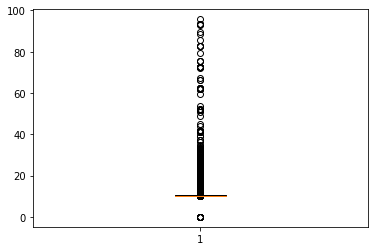

In [8]:
import matplotlib.pyplot as plt

plt.boxplot(dt[dt < 100])

Objective: Calculate how long a particular time is displayed.

In [9]:
df_u6S

,station,line,towards,contdown,time,dt
9,Längenfeldgasse,U6,SIEBENHIRTEN,"[2, 6, 9, 13, 18, 21, 24, 29, 33, 37, 42, 45, ...",1.637752e+09,0.000000
21,Längenfeldgasse,U6,SIEBENHIRTEN,"[1, 5, 8, 12, 17, 20, 23, 28, 32, 36, 41, 44, ...",1.637752e+09,59.762884
33,Längenfeldgasse,U6,SIEBENHIRTEN,"[0, 4, 7, 11, 16, 19, 22, 27, 31, 35, 40, 43, ...",1.637752e+09,10.322638
45,Längenfeldgasse,U6,SIEBENHIRTEN,"[0, 4, 7, 11, 16, 19, 22, 27, 31, 35, 40, 43, ...",1.637752e+09,10.369688
57,Längenfeldgasse,U6,SIEBENHIRTEN,"[0, 4, 7, 11, 16, 19, 22, 27, 31, 35, 40, 43, ...",1.637752e+09,10.416961
...,...,...,...,...,...,...
711236,Längenfeldgasse,U6,SIEBENHIRTEN,"[2, 11, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48...",1.638530e+09,10.379536
711248,Längenfeldgasse,U6,SIEBENHIRTEN,"[2, 11, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48...",1.638530e+09,10.323791
711260,Längenfeldgasse,U6,SIEBENHIRTEN,"[2, 11, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48...",1.638530e+09,10.387397
711272,Längenfeldgasse,U6,SIEBENHIRTEN,"[2, 11, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48...",1.638530e+09,10.333113


In [10]:
df_u6S_clean = df_u6S.loc[(df_u6S['dt'] < 12) & (df_u6S['dt'] > 6)]

In [11]:
dt = np.array(df_u6S_clean['dt'])
cntdwn = np.array(df_u6S_clean['contdown'])

import json

cntdwn = [json.loads(x) for x in cntdwn]


In [12]:
df_t_dt = pd.DataFrame(cntdwn)
df_t_dt.insert(0, 'dt', dt)
df_t_dt


,dt,0,1,2,3,4,5,6,7,8,...,16,17,18,19,20,21,22,23,24,25
0,10.322638,0,4,7.0,11.0,16.0,19.0,22.0,27.0,31.0,...,62.0,66.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10.369688,0,4,7.0,11.0,16.0,19.0,22.0,27.0,31.0,...,62.0,66.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10.416961,0,4,7.0,11.0,16.0,19.0,22.0,27.0,31.0,...,62.0,66.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10.382459,2,5,9.0,14.0,17.0,20.0,25.0,29.0,33.0,...,64.0,66.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10.374851,2,5,9.0,14.0,17.0,20.0,25.0,29.0,33.0,...,64.0,66.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54050,10.379536,2,11,12.0,16.0,20.0,24.0,28.0,32.0,36.0,...,65.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54051,10.323791,2,11,12.0,16.0,20.0,24.0,28.0,32.0,36.0,...,65.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54052,10.387397,2,11,12.0,16.0,20.0,24.0,28.0,32.0,36.0,...,65.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54053,10.333113,2,11,12.0,16.0,20.0,24.0,28.0,32.0,36.0,...,65.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
arr = df_t_dt[0][0]
accum_time = 0
results = list()
incomplete_train = True

for dt, col0 in zip(df_t_dt['dt'], df_t_dt[0]):
    if incomplete_train:
        if incomplete_train_time == col0:
            pass
        else:
            incomplete_train = False

    if col0 == arr:
        accum_time += dt
    elif col0 > arr and not incomplete_train:
        # if the display is updated for the next train we need to exempt this minute because it might already have started
        incomplete_train = True
        incomplete_train_time = col0
    else:
        accum_time += dt
        results.append((accum_time, arr))
        accum_time = 0
        arr = col0

results

[(41.484137773513794, 0),
 (41.64095330238342, 2),
 (51.842193603515625, 1),
 (52.06954836845398, 0),
 (10.360515117645264, 3),
 (41.47324466705322, 2),
 (43.273539781570435, 1),
 (31.099228382110596, 0),
 (11.913623094558716, 5),
 (73.0122127532959, 4),
 (31.243488550186157, 3),
 (62.60204863548279, 2),
 (51.863638162612915, 1),
 (72.89626550674438, 0),
 (41.71694374084473, 4),
 (41.636374711990356, 3),
 (51.90302276611328, 2),
 (51.75634241104126, 1),
 (114.68414998054504, 0),
 (104.92100429534912, 4),
 (31.297502756118774, 3),
 (62.2865104675293, 2),
 (72.74751782417297, 1),
 (41.53302049636841, 0),
 (10.394040584564209, 5),
 (134.81358075141907, 4),
 (41.55211138725281, 3),
 (54.53310990333557, 2),
 (62.478023052215576, 1),
 (53.62510132789612, 0),
 (43.324434757232666, 1),
 (31.198749780654907, 0),
 (31.075962781906128, 5),
 (114.65303564071655, 4),
 (41.45143365859985, 3),
 (52.39327311515808, 2),
 (52.77846598625183, 1),
 (52.00443243980408, 0),
 (20.958317279815674, 2),
 (73.39

In [42]:
df_res = pd.DataFrame(results)
df_res.columns = ['time', 'arrival']
df_res_means = df_res.pivot_table(values='time', index='arrival', aggfunc=np.mean)

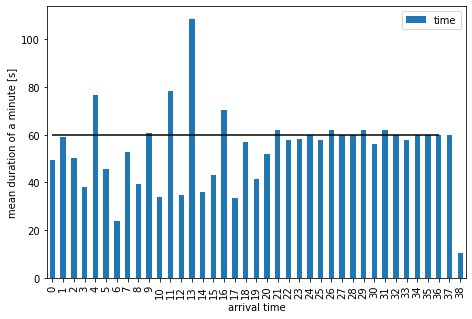

In [43]:
df_res_means.plot.bar(figsize=(7.5,5))
plt.hlines(60, xmin=0, xmax=36, color="black")
plt.xlabel("arrival time")
plt.ylabel("mean duration of a minute [s]")
plt.show()

In [136]:
df_t_dt[['dt', 0]]

,dt,0
0,10.322638,0
1,10.369688,0
2,10.416961,0
3,10.382459,2
4,10.374851,2
...,...,...
54050,10.379536,2
54051,10.323791,2
54052,10.387397,2
54053,10.333113,2


# Different approach with train-tracking

In [65]:
import json

# fix column name, reorder columns
df = df_u6S.rename(columns={'contdown':'countdown'})[['station', 'line', 'towards', 'time', 'countdown']]

# convert countdown list to columns
cntdwn = df['countdown']
cntdwn = pd.DataFrame([json.loads(x) for x in cntdwn])
cntdwn = cntdwn.set_index(df.index)

df_comb = pd.concat([df, cntdwn], axis=1).drop(columns='countdown')
df_subset = df_comb.iloc[19000:19100]
df_subset

,station,line,towards,time,0,1,2,3,4,5,...,16,17,18,19,20,21,22,23,24,25
213074,Längenfeldgasse,U6,SIEBENHIRTEN,1.638069e+09,13,34,47.0,56.0,66.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213083,Längenfeldgasse,U6,SIEBENHIRTEN,1.638069e+09,13,34,47.0,56.0,66.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213092,Längenfeldgasse,U6,SIEBENHIRTEN,1.638069e+09,13,34,46.0,56.0,66.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213101,Längenfeldgasse,U6,SIEBENHIRTEN,1.638069e+09,13,34,46.0,56.0,66.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213110,Längenfeldgasse,U6,SIEBENHIRTEN,1.638069e+09,13,34,46.0,56.0,66.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215448,Längenfeldgasse,U6,SIEBENHIRTEN,1.638072e+09,7,18,26.0,36.0,46.0,56.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215460,Längenfeldgasse,U6,SIEBENHIRTEN,1.638072e+09,6,16,26.0,36.0,46.0,56.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215472,Längenfeldgasse,U6,SIEBENHIRTEN,1.638072e+09,6,16,25.0,35.0,45.0,55.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215484,Längenfeldgasse,U6,SIEBENHIRTEN,1.638072e+09,6,16,25.0,35.0,45.0,55.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 32
df_subset

,station,line,towards,time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
213074,Längenfeldgasse,U6,SIEBENHIRTEN,1.638069e+09,13,34,47.0,56.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213083,Längenfeldgasse,U6,SIEBENHIRTEN,1.638069e+09,13,34,47.0,56.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213092,Längenfeldgasse,U6,SIEBENHIRTEN,1.638069e+09,13,34,46.0,56.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213101,Längenfeldgasse,U6,SIEBENHIRTEN,1.638069e+09,13,34,46.0,56.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213110,Längenfeldgasse,U6,SIEBENHIRTEN,1.638069e+09,13,34,46.0,56.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213119,Längenfeldgasse,U6,SIEBENHIRTEN,1.638069e+09,13,34,46.0,55.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213128,Längenfeldgasse,U6,SIEBENHIRTEN,1.638069e+09,13,34,46.0,55.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213137,Längenfeldgasse,U6,SIEBENHIRTEN,1.638070e+09,12,32,46.0,55.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213146,Längenfeldgasse,U6,SIEBENHIRTEN,1.638070e+09,12,32,45.0,55.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213155,Längenfeldgasse,U6,SIEBENHIRTEN,1.638070e+09,12,32,45.0,55.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
trains = pd.DataFrame(columns=['train-ID', 'track_start', 'arrival', *range(len(cntdwn.columns)) ])
trains

,train-ID,track_start,arrival,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25


for record in df
start tracking, save trains in train df
